In [1]:
import numpy as np

from utils.loadData import loadData
from lstm.preprocessing import dataToTimeSeries, getDatasets, normalizeAtOnce
from lstm.model import getModel, evaluateModelQuick, evaluateFinal
from lstm.visualization import visualize_loss, show_batch, show_data_simple, showRegressionExample
from lstm.callbacks import es_callback, modelckpt_callback

In [2]:
df = loadData()

In [3]:
features = np.array(df["Close"]).reshape(-1, 1)
normalized_data, scaler = normalizeAtOnce(features)
normalized_data = normalized_data[2200:]

2022-04-22 17:11:14.972802: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


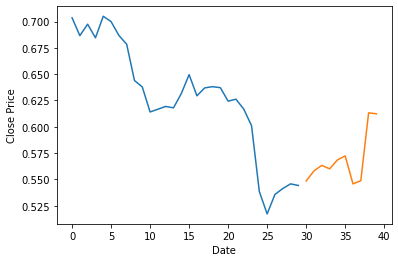

Input shape: (28, 30, 1)
Target shape: (28, 1)


In [4]:
config = {
    "past": 30, # try 10, 50, 100, 300
    "future": 10, # try 5, 50, 100
    "neurons": 100,
    "batch_size": 128, # large batches allow faster training
    "epochs": 10,
    "features": 1
}

dataset_train, dataset_val, x_test, y_test = getDatasets(config, normalized_data)


for batch in dataset_val.take(1):
    inputs, targets = batch
    show_batch(inputs[0], targets[:config["future"]], config["past"])

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

In [5]:
model = getModel(config)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30, 1)]           0         
                                                                 
 lstm (LSTM)                 (None, 30, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 10)                1010      
                                                                 
Total params: 122,210
Trainable params: 122,210
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
3/4 [=====================>........] - ETA: 0s - loss: 0.3394 - rmse: 0.5826 - mae: 0.5528 - mape: 90.7644
Epoch 1: val_loss improved from inf to 0.12376, saving model to checkpoints/model_checkpoint.h5
4/4 [==============================] - 4s 396ms/step - loss: 0.3368 - rmse: 0.5803 - mae: 0.5530 - mape: 88.6099 - val_loss: 0.1238 - val_rmse: 0.3518 - val_mae: 0.3441 - val_mape: 57.3536
Epoch 2/10
3/4 [=====================>........] - ETA: 0s - loss: 0.0745 - rmse: 0.2730 - mae: 0.2357 - mape: 39.8350
Epoch 2: val_loss improved from 0.12376 to 0.07716, saving model to checkpoints/model_checkpoint.h5
4/4 [==============================] - 0s 95ms/step - loss: 0.0743 - rmse: 0.2726 - mae: 0.2315 - mape: 38.3072 - val_loss: 0.0772 - val_rmse: 0.2778 - val_mae: 0.2589 - val_mape: 43.9692
Epoch 3/10
3/4 [=====================>........] - ETA: 0s - loss: 0.0447 - rmse: 0.2115 - mae: 0.1799 - mape: 36.3049
Epoch 3: val_loss improved from 0.07716 to 0.01052, saving model to check

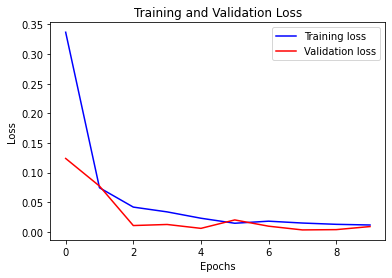

In [6]:
history = model.fit(
    dataset_train,
    epochs=config["epochs"],
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)
visualize_loss(history)

In [7]:
x, y = dataToTimeSeries(x_test, y_test, config["past"], config["future"])

In [8]:
evaluateModelQuick(model, x, y)

1/1 [==============================] - 1s 805ms/step - loss: 0.0035 - rmse: 0.0589 - mae: 0.0491 - mape: 7.6833
---- TEST RESULTS ----
MSE loss - 0.003467822214588523
RMSE - 0.05888821557164192


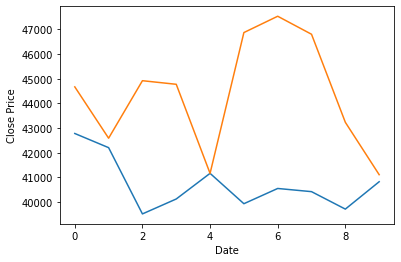

In [9]:
showRegressionExample(x[15], y[15], model, scaler)

In [10]:
evaluateFinal(getModel, dataset_train, dataset_val, config, "regression_just_price")

Training Started...
Iterations:
1
2
3
4
5
6
7
8
9
10
Done
